In [39]:
import gc
import os
import sys
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt 

from dotenv import load_dotenv
load_dotenv()
sys.path.insert(0, os.getenv('PROJECT_FUNCTIONS_PATH'))

from grn_helpers import set_custom_folders

In [40]:
root_dir = os.getenv('BASE_PATH')

In [41]:
neurons_set = "L2-3_CUX2"
# neurons_set = "all_ex"
# neurons_set = "all_ex_all_ages"

# gois = ["AR", "THRB", "ESR2", "NR1H3", "NR1H2", "RARA", "RARG", "AHR", "NR3C1"]
# gois = ['AHR', 'AR', 'NR1I2', 'NR1I3', 'NR3C1', 'NR3C2', 'ESR1', 'RARA', 'ESR2', 'THRB', 'THRA']
gois = ['FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'FGFRL1'] # FGF pathway
gois = gois + ['PTCH1', 'SMO', 'GLI1', 'GLI2', 'GLI3', 'GLI4'] # SAG pathway
gois = gois + ['BMPR1A', 'BMPR1B'] # BMP4 pathway
gois = gois + ['ACVR1'] # BMP7 pathway
gois = gois + ['CTNNB1', 'WNT5A', 'WNT3A', 'WNT3', 'APC', 'WNT10B'] # WNT pathway ('WNT1' is missing)
gois = gois + ['RARA', 'RARB', 'RARG', 'RXRA', 'RXRB', 'RXRG'] # Retinoic Acid pathway
print(f"gois: {gois}")
# Available genes: ['FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'FGFRL1', 'PTCH1', 'SMO', 'GLI1', 'GLI2', 'GLI3', 'GLI4', 'BMPR1A', 'BMPR1B', 'ACVR1', 'CTNNB1', 'WNT5A', 'WNT3A', 'WNT3', 'APC', 'WNT10B', 'RARA', 'RARB', 'RARG', 'RXRA', 'RXRB', 'RXRG']
# Missing genes: ['WNT1']

gois: ['FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'FGFRL1', 'PTCH1', 'SMO', 'GLI1', 'GLI2', 'GLI3', 'GLI4', 'BMPR1A', 'BMPR1B', 'ACVR1', 'CTNNB1', 'WNT5A', 'WNT3A', 'WNT3', 'APC', 'WNT10B', 'RARA', 'RARB', 'RARG', 'RXRA', 'RXRB', 'RXRG']


In [42]:
cells_dict = {
    "all_ex"            :   ['L5-6_TLE4', 'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'PN_dev'],
    "all_ex_all_ages"   :   ['L5-6_TLE4', 'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'PN_dev'],
    "L2-3_CUX2"         :   ['L2-3_CUX2']
}

ages_dict = {
    "all_ex"           :   ['1m','3m','6m','10m','1y','2y','4y','ga22','ga24'],
    "all_ex_all_ages"  :   ['1m','3m','6m','10m','1y','2y','4y','6y','10y','16y','20y','40y','ga22','ga24'],
    "L2-3_CUX2"        :   ['1m','3m','6m','10m','1y','2y','4y','ga22','ga24']
}

output_dir, input_dir, root_dir, _, in_dir_from_scenic = set_custom_folders(root_dir, neurons_set)

sel_celltypes  = cells_dict[neurons_set]
sel_ages = ages_dict[neurons_set]

root_dir: /group/testa/michal.kubacki/herring_minimal
out_dir: /group/testa/michal.kubacki/herring_minimal/L2-3_CUX2/celloracle
in_dir: /group/testa/michal.kubacki/herring_minimal/data
tmp_dir: /group/testa/michal.kubacki/herring_minimal/celloracle/tmp


In [43]:
plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [44]:
adata = sc.read_h5ad(os.path.join(input_dir, 'Processed_data_RNA-all_full-counts-and-downsampled-CPM.h5ad'))
adata_metadata = pd.read_csv(os.path.join(in_dir_from_scenic, 'cells_data.csv'), sep=",", index_col = 0)

In [45]:
adata_metadata.head()

,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,nFrags,...,predictedScore,FRIP,ReadsInPeaks,age,chem,major_clust,age_mapped,old_index,id,predictedCellFormatted
TTGCGGGCATTGCGAT-1-3m,3.187,1534.0,9410.0,981.0,0.052331,1.0,0.939366,8204.0,46360.0,89909.0,...,0.335881,0.420796,74502.0,86d,v3,L2-3_CUX2,3m,TTGCGGGCATTGCGAT-1,TTGCGGGCATTGCGAT-1-3m,GCTACCTCAGCTTCCT-1-3m
ACATGCATCAATTCCT-1-ga24,2.553,1012.0,7014.0,700.0,0.047747,1.0,0.786993,5692.0,41102.0,73449.0,...,0.541803,0.384517,56111.0,ga34,v3,L5-6_TLE4,ga24,ACATGCATCAATTCCT-1,ACATGCATCAATTCCT-1-ga24,TCCTTCTTCCTAAACG-1-ga24
CCGTGAGCAGGTAGCA-1-6m,2.914,1167.0,7173.0,1268.0,0.050797,1.0,0.954166,6839.0,36130.0,70604.0,...,0.439298,0.398352,54136.0,179d,v3,L5-6_TLE4,6m,CCGTGAGCAGGTAGCA-1,CCGTGAGCAGGTAGCA-1-6m,CCTTTGGGTGTATTCG-1-6m
TTACTCACAACTCCCT-1-ga24,2.684,1095.0,7214.0,1044.0,0.051844,1.0,0.771999,7073.0,39263.0,69574.0,...,0.372978,0.361398,49385.0,ga34,v3,L5-6_TLE4,ga24,TTACTCACAACTCCCT-1,TTACTCACAACTCCCT-1-ga24,TATACCTAGGGCAACT-1-ga24
CCACAGGAGACACGGT-1-ga24,3.119,1208.0,7018.0,737.0,0.052616,1.0,1.795448,8900.0,23857.0,66691.0,...,0.326004,0.442014,57643.0,ga34,v3,L5-6_TLE4,ga24,CCACAGGAGACACGGT-1,CCACAGGAGACACGGT-1-ga24,TATACCTAGGGCAACT-1-ga24


In [46]:
print(f"adata_metadata.age: {adata_metadata.age[:5]}")
print(f"adata_metadata.age_mapped: {adata_metadata.age_mapped[:5]}")

adata_metadata.age: TTGCGGGCATTGCGAT-1-3m       86d
ACATGCATCAATTCCT-1-ga24    ga34
CCGTGAGCAGGTAGCA-1-6m      179d
TTACTCACAACTCCCT-1-ga24    ga34
CCACAGGAGACACGGT-1-ga24    ga34
Name: age, dtype: object
adata_metadata.age_mapped: TTGCGGGCATTGCGAT-1-3m        3m
ACATGCATCAATTCCT-1-ga24    ga24
CCGTGAGCAGGTAGCA-1-6m        6m
TTACTCACAACTCCCT-1-ga24    ga24
CCACAGGAGACACGGT-1-ga24    ga24
Name: age_mapped, dtype: object


In [47]:
print(adata.obs.age.head())

AAACCTGAGAGTCGGT-RL1612_34d_v2    34d
AAACCTGAGCCGCCTA-RL1612_34d_v2    34d
AAACCTGAGTCGAGTG-RL1612_34d_v2    34d
AAACCTGAGTGAACAT-RL1612_34d_v2    34d
AAACCTGCAAGGACTG-RL1612_34d_v2    34d
Name: age, dtype: category
Categories (24, object): ['2d', '2yr', '3yr', '4yr', ..., '627d', 'ga22', 'ga24', 'ga34']


In [48]:
print("Shape of adata:", adata.shape)
print("\nGenes in adata:", len(adata.var_names))
print("\nFirst few genes:", list(adata.var_names)[:5])

if 'gois' in globals():
    common_genes = set(adata.var_names).intersection(gois)
    print(f"Out of {len(gois)} genes of interest, {len(common_genes)} are present in the dataset")
    if len(common_genes) > 0:
        print("Genes of interest present:", list(common_genes))
else:
    print("\nNote: 'gois' variable not defined yet")

Shape of adata: (154748, 26747)

Genes in adata: 26747

First few genes: ['RP11-34P13.7', 'AL627309.1', 'RP11-34P13.14', 'AP006222.2', 'RP4-669L17.10']
Out of 26 genes of interest, 26 are present in the dataset
Genes of interest present: ['WNT3', 'FGFR3', 'SMO', 'FGFR4', 'GLI4', 'PTCH1', 'GLI2', 'FGFR1', 'GLI1', 'WNT3A', 'RARA', 'CTNNB1', 'BMPR1B', 'ACVR1', 'RARB', 'WNT5A', 'RXRA', 'GLI3', 'WNT10B', 'APC', 'RXRG', 'BMPR1A', 'FGFR2', 'RXRB', 'RARG', 'FGFRL1']


In [49]:
age_mapping = dict(zip(adata_metadata.age, adata_metadata.age_mapped))

# Apply the mapping to adata.obs.age
adata.obs['age_mapped'] = adata.obs.age.map(age_mapping)

# If there are any values in adata.obs.age that don't have a mapping,
# they will become NaN. To keep the original values for these cases, use:
adata.obs['age_mapped'] = adata.obs.age.map(age_mapping).fillna(adata.obs.age)

# Display the first few rows to verify the mapping
print(adata.obs[['age', 'age_mapped']].head())

# how many values were mapped vs. unmapped:
mapped_count = adata.obs.age_mapped.notna().sum()
total_count = len(adata.obs.age)
print(f"Mapped {mapped_count} out of {total_count} values")
print(f"Mapping rate: {mapped_count/total_count:.2%}")

                                age age_mapped
AAACCTGAGAGTCGGT-RL1612_34d_v2  34d        34d
AAACCTGAGCCGCCTA-RL1612_34d_v2  34d        34d
AAACCTGAGTCGAGTG-RL1612_34d_v2  34d        34d
AAACCTGAGTGAACAT-RL1612_34d_v2  34d        34d
AAACCTGCAAGGACTG-RL1612_34d_v2  34d        34d
Mapped 154748 out of 154748 values
Mapping rate: 100.00%


In [50]:
adata.obs.age_mapped.unique()

array(['34d', '2y', '8yr', '1m', '3m', '16yr', 'ga22', '6yr', 'ga24',
       '6m', '4y', '10yr', '10m', '20yr', '40yr', '1y', '12yr', '14yr',
       '17yr', '25yr'], dtype=object)

In [51]:
print(adata.shape)
adata = adata[adata.obs['chem']=='v3']
print(adata.shape)

(154748, 26747)


(141385, 26747)


In [52]:
adata = adata[adata.obs.age_mapped.isin(sel_ages)]
print(adata.shape)

(83537, 26747)


In [53]:
adata = adata[adata.obs['major_clust'].isin(sel_celltypes)]
print(adata.shape)

(14513, 26747)


In [54]:
adata.obs.age.unique()

['2d', '2yr', '86d', 'ga22', '118d', ..., '4yr', 'ga34', '301d', '422d', '3yr']
Length: 13
Categories (13, object): ['2d', '2yr', '3yr', '4yr', ..., '627d', 'ga22', 'ga24', 'ga34']

In [55]:
for cell in adata.obs['major_clust'].unique():
    print(f"{cell}: {(adata.obs['major_clust']==cell).sum()}")

# %% [markdown]
# # Filter data

L2-3_CUX2: 14513


/home/michal.kubacki/.conda/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


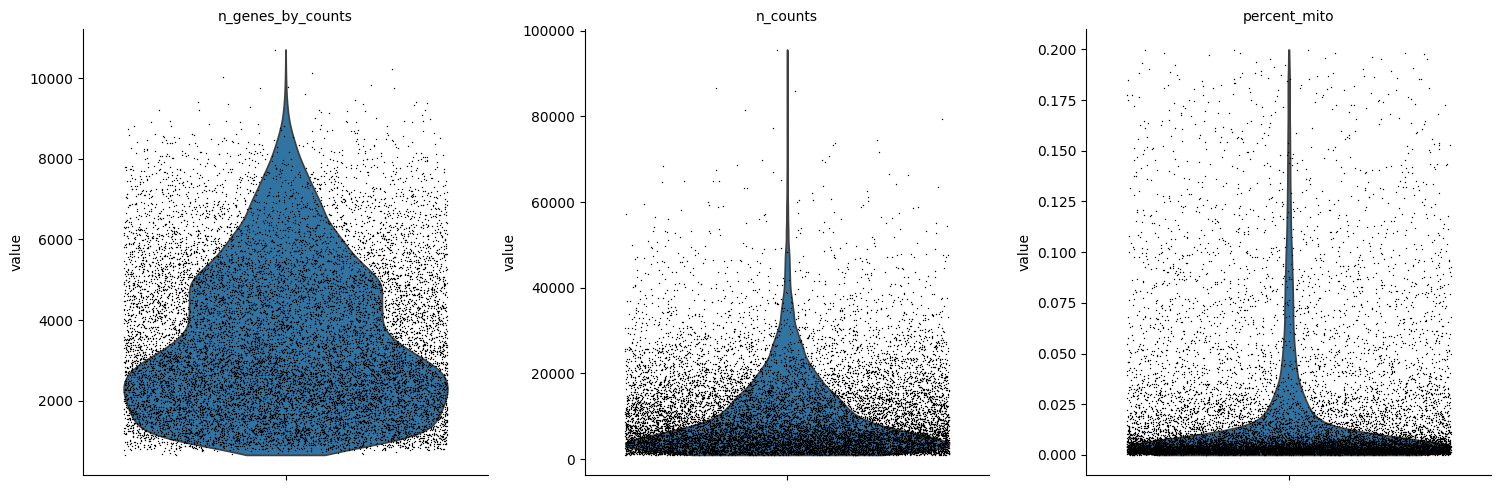

In [56]:
sc.pl.violin(adata, ["n_genes_by_counts", "n_counts", "percent_mito"], 
             jitter=0.4, multi_panel=True, show=False)
plt.tight_layout()
plt.show()
plt.close()

In [57]:
min_genes_percentile = 2
max_genes_percentile = 98
min_counts_percentile = 2
max_counts_percentile = 98
max_mito_percent = 30

# percentiles for filtering criteria
min_genes = np.percentile(adata.obs['n_genes_by_counts'], min_genes_percentile)
max_genes = np.percentile(adata.obs['n_genes_by_counts'], max_genes_percentile)
min_counts = np.percentile(adata.obs['n_counts'], min_counts_percentile)
max_counts = np.percentile(adata.obs['n_counts'], max_counts_percentile)
max_mito = max_mito_percent

print(f" min_genes: {min_genes},\n max_genes: {max_genes},\n min_counts: {min_counts},\n max_counts: {max_counts},\n max_mito: {max_mito}")

 min_genes: 921.0,
 max_genes: 7735.52,
 min_counts: 1244.24,
 max_counts: 38906.64000000001,
 max_mito: 30


In [58]:
print(f"Number of cells before filtering: {adata.n_obs}")

cell_type_to_exclude = 'none'



mask = (adata.obs['n_genes_by_counts'] >= min_genes) & (adata.obs['n_genes_by_counts'] <= max_genes) & \
        (adata.obs['n_counts'] >= min_counts) & (adata.obs['n_counts'] <= max_counts) & \
        (adata.obs['percent_mito'] <= max_mito) | (adata.obs.major_clust==cell_type_to_exclude)

adata = adata[mask, :]

print(f"Number of cells after filtering: {adata.n_obs}")

Number of cells before filtering: 14513
Number of cells after filtering: 13787


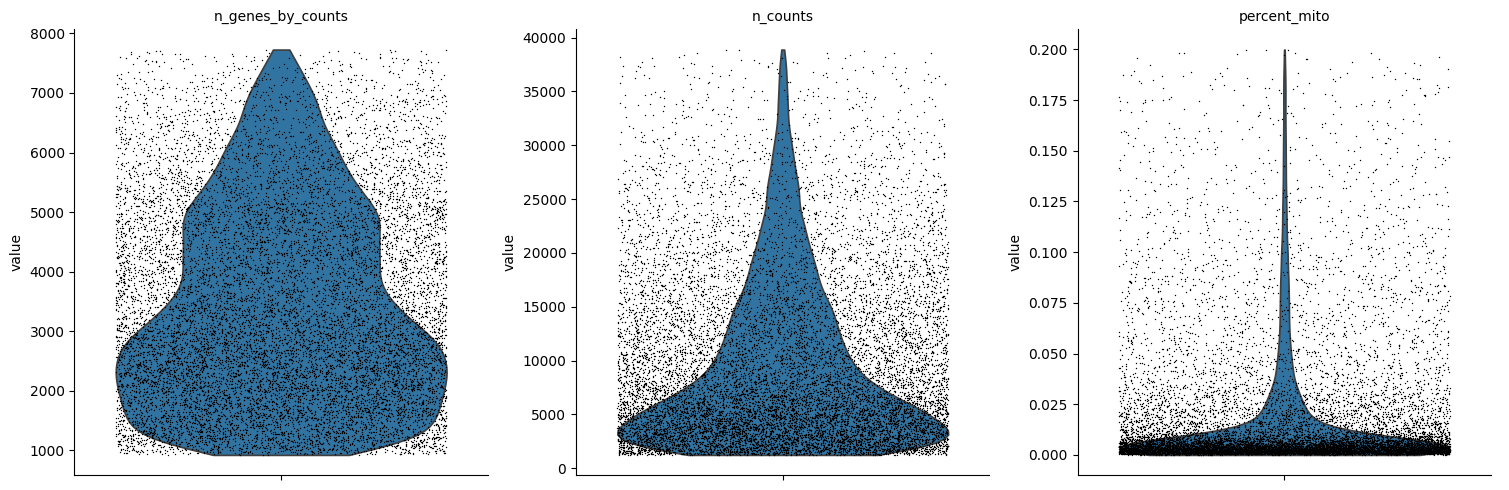

In [59]:
sc.pl.violin(adata, ["n_genes_by_counts", "n_counts", "percent_mito"], 
             jitter=0.4, multi_panel=True, show=False)
plt.tight_layout()
plt.show()
plt.close()

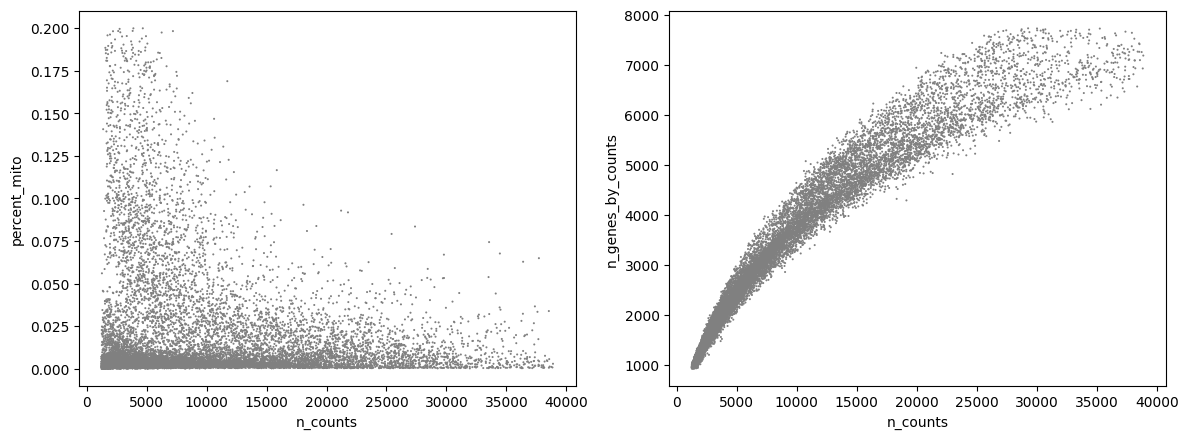

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))
sc.pl.scatter(adata, x="n_counts", y="percent_mito", ax=ax1, show=False)
sc.pl.scatter(adata, x="n_counts", y="n_genes_by_counts", ax=ax2, show=False)
plt.tight_layout()
plt.show()
plt.close()

In [61]:
gc.collect()

# %% [markdown]
# ## Downsample data

24923

In [62]:
adata.shape

(13787, 26747)

In [63]:
print([f"{celltype}: {len(adata.obs.major_clust[adata.obs.major_clust==celltype])}" for celltype in adata.obs.major_clust.unique()])

['L2-3_CUX2: 13787']


In [64]:
n_cells_downsample = 30000
if adata.shape[0] > n_cells_downsample:
    sc.pp.subsample(adata, n_obs=n_cells_downsample, random_state=123)

In [65]:
print([f"{celltype}: {len(adata.obs.major_clust[adata.obs.major_clust==celltype])}" for celltype in adata.obs.major_clust.unique()])

['L2-3_CUX2: 13787']


In [66]:
types = list(adata.obs.major_clust.unique())
types

# %% [markdown]
# # Normalize data

['L2-3_CUX2']

In [67]:
adata.raw = adata

In [68]:
adata.layers['counts'] = adata.X.copy()
sc.pp.filter_genes(adata, min_cells = 1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

print(adata.layers['counts'][:20, :20])
print(adata.X.data[:10])
print(adata.layers['ds_norm_cts'].data[:10])

  (1, 18)	1.0
  (2, 10)	1.0
  (2, 3)	1.0
  (4, 17)	1.0
  (4, 6)	3.0
  (5, 10)	1.0
  (6, 17)	1.0
  (6, 10)	1.0
  (6, 3)	1.0
  (7, 6)	1.0
  (9, 10)	1.0
  (9, 4)	1.0
  (10, 10)	1.0
  (11, 17)	1.0
  (12, 10)	1.0
  (12, 1)	1.0
  (13, 17)	1.0
  (13, 10)	1.0
  (14, 17)	1.0
  (14, 6)	1.0
  (14, 4)	1.0
  (15, 17)	1.0
  (16, 17)	1.0
  (18, 10)	1.0
  (18, 6)	1.0
  (19, 6)	2.0
  (19, 3)	2.0
[0.9653271  0.5948854  0.34104148 0.5948854  0.34104148 0.34104148
 0.34104148 0.34104148 0.34104148 0.34104148]
[6.90875478 6.90875478 7.60140233 6.90875478 6.90875478 6.90875478
 6.90875478 6.90875478 6.90875478 7.60140233]


In [69]:
gc.collect()

21394

In [70]:
sc.pp.highly_variable_genes(adata, inplace = True, n_top_genes=3000) #subset = True
adata

AnnData object with n_obs × n_vars = 13787 × 26590
    obs: 'batch', 'RL#', 'age', 'chem', 'concat_id', 'numerical_age', 'stage_id', 'Sex', 'Race', 'PMI', 'Brain Regions*', 'Cause of Death', 'ICD-10 Code', 'ICD-10 category', 'Oxygen/No Oxygen', 'Date-of-Collection', 'Collection_year', 'Library Prep Date', 'Library Prep Lot', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'doublet_score', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden', 'mat/dev', 'cell_type', 'major_clust', 'sub_clust', 'combined-leiden', 'Astro_GFAP_dev-traj', 'Astro_SLC1A2_dev-traj', 'L2_CUX2_LAMP5_dev-traj', 'L3_CUX2_PRSS12_dev-traj', 'L4_RORB_LRRK1_dev-traj', 'L4_RORB_MET_dev-traj', 'L4_RORB_MME_dev-traj', 'L5-6_THEMIS_CNR1_dev-traj', 'L5-6_THEMIS_NTNG2_dev-traj', 'L5-6_TLE4_HTR2C_dev-traj', 'L5-6_TLE4_SCUBE1_dev-traj', 'L5-6_TLE4_SORCS1_dev-traj', 'Micro_dev-traj', 'OPC_dev-traj', 'OPC_MBP_dev-traj', 'Oligo_dev-traj', 'Vas_CLDN5_d

In [71]:
np.sum(adata.var['highly_variable'])

# %% [markdown]
# # Pseudobulk

3000

In [72]:
# Group cells by major_clust and calculate mean expression values
counts_data = adata.layers["ds_norm_cts"].toarray()
pseudobulk_df = pd.DataFrame(counts_data, index=adata.obs.index, columns=adata.var_names)
pseudobulk_df["major_clust"] = adata.obs["major_clust"]
pseudobulk_df = pseudobulk_df.groupby("major_clust").mean()

# Create a new AnnData object for pseudobulk data
pseudobulk_adata = sc.AnnData(X=pseudobulk_df.values, obs=pd.DataFrame(index=pseudobulk_df.index), var=pd.DataFrame(index=pseudobulk_df.columns))

/localscratch/18756186.michal.kubacki/ipykernel_217939/829822108.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pseudobulk_df = pseudobulk_df.groupby("major_clust").mean()


In [73]:
pseudobulk_df.head()

,RP11-34P13.7,AL627309.1,RP11-34P13.14,AP006222.2,RP4-669L17.10,RP5-857K21.2,RP5-857K21.4,RP11-206L10.3,RP11-206L10.5,RP11-206L10.2,...,ZNF84-1,AL603926.1,AL592183.1,AC011841.1,AL354822.1,AL590523.1,PNRC2-1,SRSF10-1,AC145205.1,CU459201.1
major_clust,,,,,,,,,,,,,,,,,,,,,
L2-3_CUX2,0.003007,0.002004,0.000501,0.072761,0.123874,0.0,0.478507,0.001002,0.001503,0.012528,...,0.001503,0.00902,0.484245,0.0,0.089228,0.000501,0.004059,0.043196,0.00902,0.001503


In [74]:
pseudobulk_adata

# %% [markdown]
# ### scRNAseq - receptors expression

AnnData object with n_obs × n_vars = 1 × 26590

In [75]:
print("Shape of pseudobulk_adata:", pseudobulk_adata.shape)
print("\nGenes in pseudobulk_adata:", len(pseudobulk_adata.var_names))
print("\nFirst few genes:", list(pseudobulk_adata.var_names)[:5])

if 'gois' in globals():
    common_genes = set(pseudobulk_adata.var_names).intersection(gois)
    print(f"Out of {len(gois)} genes of interest, {len(common_genes)} are present in the dataset")
    if len(common_genes) > 0:
        print("Genes of interest present:", list(common_genes))
else:
    print("\nNote: 'gois' variable not defined yet")

Shape of pseudobulk_adata: (1, 26590)

Genes in pseudobulk_adata: 26590

First few genes: ['RP11-34P13.7', 'AL627309.1', 'RP11-34P13.14', 'AP006222.2', 'RP4-669L17.10']
Out of 26 genes of interest, 26 are present in the dataset
Genes of interest present: ['WNT3', 'FGFR3', 'SMO', 'FGFR4', 'GLI4', 'PTCH1', 'GLI2', 'FGFR1', 'GLI1', 'WNT3A', 'RARA', 'CTNNB1', 'BMPR1B', 'ACVR1', 'RARB', 'WNT5A', 'RXRA', 'GLI3', 'WNT10B', 'APC', 'RXRG', 'BMPR1A', 'FGFR2', 'RXRB', 'RARG', 'FGFRL1']


In [76]:
# Find available genes and their indices
gene_indexs = []
available_gois = []
missing_gois = []

for goi in gois:
    gene_matches = np.where(adata.var_names == goi)[0]
    if len(gene_matches) > 0:
        gene_indexs.append(gene_matches[0])
        available_gois.append(goi)
    else:
        missing_gois.append(goi)

print("\nAvailable genes:", available_gois)
print("Missing genes:", missing_gois)
print(f"Found {len(available_gois)} out of {len(gois)} genes")

if len(available_gois) == 0:
    print("\nNo genes of interest found in the dataset. Please check gene names.")
    sys.exit(1)

# Update subsequent code to use available_gois instead of gois
for i, goi in enumerate(available_gois):
    expression_bulk = pseudobulk_adata.X[:,gene_indexs[i]]
    print([f"Expression of {goi} in {cell}: {expression}" for cell, expression in zip(pseudobulk_adata.obs_names, expression_bulk)])


Available genes: ['FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'FGFRL1', 'PTCH1', 'SMO', 'GLI1', 'GLI2', 'GLI3', 'GLI4', 'BMPR1A', 'BMPR1B', 'ACVR1', 'CTNNB1', 'WNT5A', 'WNT3A', 'WNT3', 'APC', 'WNT10B', 'RARA', 'RARB', 'RARG', 'RXRA', 'RXRB', 'RXRG']
Missing genes: []
Found 26 out of 26 genes
['Expression of FGFR1 in L2-3_CUX2: 0.07952664009729082']
['Expression of FGFR2 in L2-3_CUX2: 0.29320209605676306']
['Expression of FGFR3 in L2-3_CUX2: 0.02605797102592199']
['Expression of FGFR4 in L2-3_CUX2: 0.02054536490548517']
['Expression of FGFRL1 in L2-3_CUX2: 0.023050897211032144']
['Expression of PTCH1 in L2-3_CUX2: 0.18681438691255495']
['Expression of SMO in L2-3_CUX2: 0.04039004256888125']
['Expression of GLI1 in L2-3_CUX2: 0.0005011064611093943']
['Expression of GLI2 in L2-3_CUX2: 0.0515653741201298']
['Expression of GLI3 in L2-3_CUX2: 0.12462331484892789']
['Expression of GLI4 in L2-3_CUX2: 0.055222696550702534']
['Expression of BMPR1A in L2-3_CUX2: 0.8912386694028838']
['Expression of BMPR

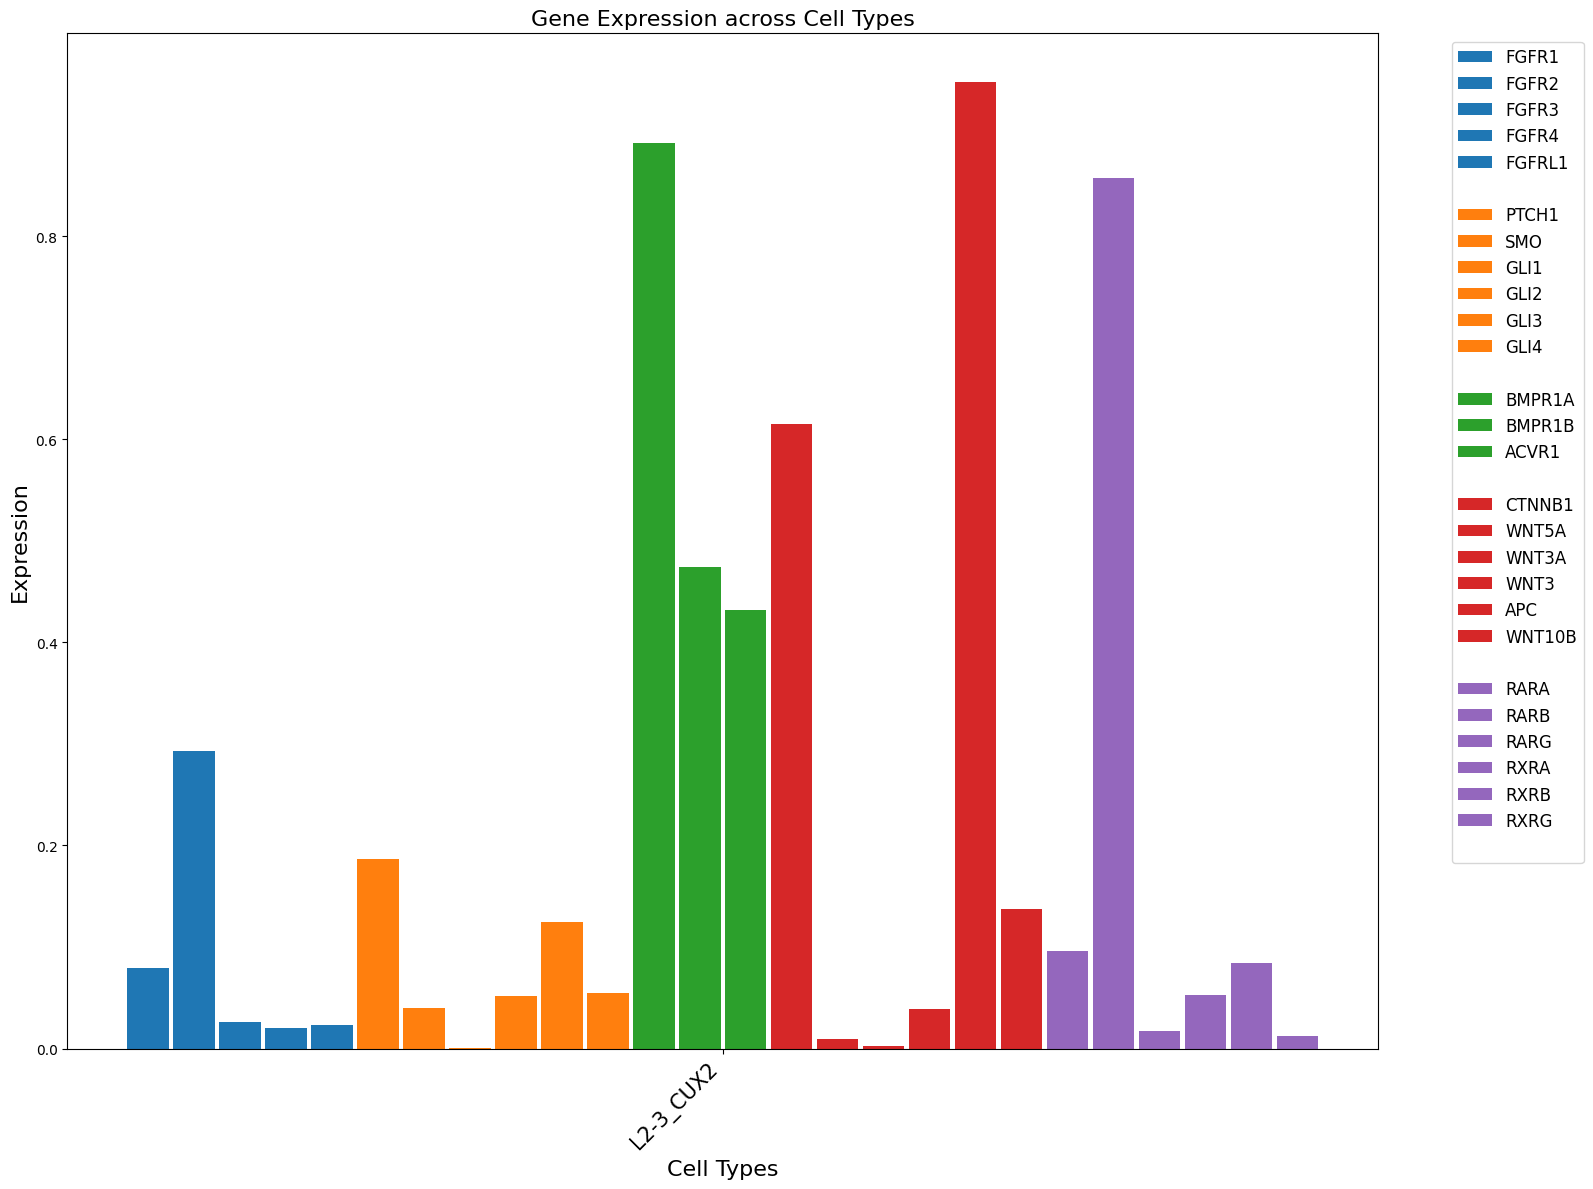

In [77]:
# Define pathway groups and colors
pathway_groups = {
    'FGF': ['FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'FGFRL1'],
    'SHH': ['PTCH1', 'SMO', 'GLI1', 'GLI2', 'GLI3', 'GLI4'],
    'BMP': ['BMPR1A', 'BMPR1B', 'ACVR1'],
    'WNT': ['CTNNB1', 'WNT5A', 'WNT3A', 'WNT3', 'APC', 'WNT10B'],
    'RA': ['RARA', 'RARB', 'RARG', 'RXRA', 'RXRB', 'RXRG']
}

pathway_colors = {
    'FGF': '#1f77b4',
    'SHH': '#ff7f0e', 
    'BMP': '#2ca02c',
    'WNT': '#d62728',
    'RA': '#9467bd'
}

expression_data = [pseudobulk_adata.X[:,gene_indexs[i]] for i in range(0,len(available_gois))]
cell_types = pseudobulk_adata.obs_names

# Create figure with larger height to accommodate vertical layout
fig, ax = plt.subplots(figsize=(16, 12))

x = np.arange(len(cell_types))
ax.set_xticks(x)
ax.set_xticklabels(cell_types, rotation=45, ha='right', fontsize=15)

bar_width = 0.1
spacing = 0.01

# Plot bars with colors based on pathway groups
for i, goi in enumerate(available_gois):
    offset = (i - (len(available_gois) - 1) / 2) * (bar_width + spacing)
    
    # Find which pathway the gene belongs to
    pathway = next((p for p, genes in pathway_groups.items() if goi in genes), 'Other')
    color = pathway_colors.get(pathway, 'gray')
    
    ax.bar(x + offset, expression_data[i], width=bar_width, label=goi, color=color)

ax.set_xlabel('Cell Types', fontsize=16)
ax.set_ylabel('Expression', fontsize=16)
ax.set_title('Gene Expression across Cell Types', fontsize=16)

# Create legend with pathway grouping
handles, labels = ax.get_legend_handles_labels()
by_pathway = {}
for h, l in zip(handles, labels):
    pathway = next((p for p, genes in pathway_groups.items() if l in genes), 'Other')
    if pathway not in by_pathway:
        by_pathway[pathway] = []
    by_pathway[pathway].append((h, l))

# Create grouped legend
legend_handles = []
legend_labels = []
for pathway in pathway_groups.keys():
    if pathway in by_pathway:
        legend_handles.extend([h for h, l in by_pathway[pathway]])
        legend_labels.extend([l for h, l in by_pathway[pathway]])
        # Add a blank space between groups
        legend_handles.append(plt.Rectangle((0,0), 1, 1, fc='none', fill=False, edgecolor='none', linewidth=0))
        legend_labels.append('')

ax.legend(legend_handles, legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()
plt.close()

In [78]:
summed_counts = np.sum(counts_data, axis=0)
print(summed_counts.shape)
print(summed_counts)

(26590,)
[ 41.45252868  27.63601862   6.90875478 ... 595.54120464 124.35758603
  20.72626434]


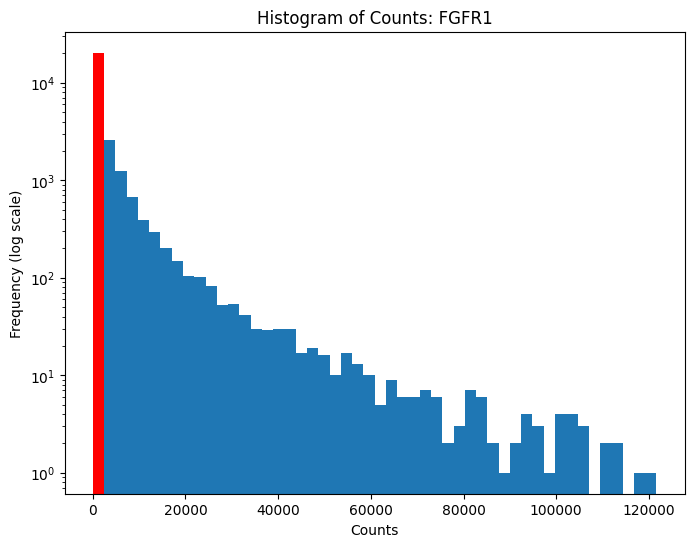

FGFR1 count: 1096.4337870213506


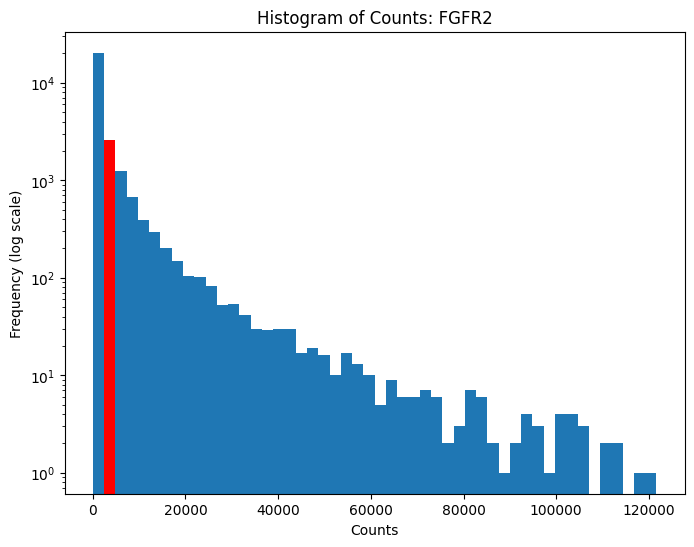

FGFR2 count: 4042.3772983345634


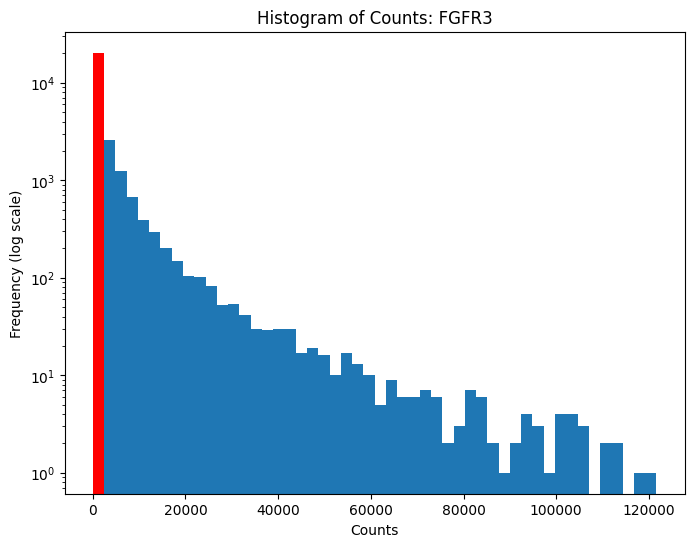

FGFR3 count: 359.2612465343867


In [79]:
for i, gene_index in enumerate(gene_indexs[:3]):
    count = summed_counts[gene_index]
                               
    plt.figure(figsize=(8, 6))
    n, bins, patches = plt.hist(summed_counts, bins=50, log=True)
    
    # Find the bin index where the gene count falls into
    bin_index = np.where(bins <= count)[0][-1]
    patches[bin_index].set_facecolor('red')
    
    plt.xlabel("Counts")
    plt.ylabel("Frequency (log scale)")
    plt.title(f"Histogram of Counts: {available_gois[i]}")
    plt.show()
    plt.close()
    print(f"{available_gois[i]} count: {count}")

In [80]:
adata.shape

(13787, 26590)

In [81]:
# file_name = os.path.join(output_dir, f"subseted_rna_andata.h5ad")
# adata.write(file_name)

In [82]:
# output_dir